In [30]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt

from lmfit import Model

In [31]:
def load_dataset(path_folder,verbose=True):
    #path='./db/' # dove sono i file excel
    files = os.listdir(path_folder)
    i = 0
    
    if verbose:
        print('File caricati:')
    
    for file in files:
        if verbose:
            print(file)
        file = path_folder + file
        meta = pd.read_excel(file,sheet_name=0,header=None)
        freq = pd.read_excel(file,sheet_name=1)
        fft = pd.read_excel(file,sheet_name=2)
        
        if i==0:
            a=np.array([meta.iloc[0,1],meta.iloc[3,1]])
            info = pd.DataFrame([a],columns=['run','cavfreq']) # -> Qui tengo le frequenze di cavità 
        
            data = pd.DataFrame({'freq':freq[1],'fft0':fft[1]}) # -> Qui frequenze e fft
            
        else:
            info.loc[len(info)]=list([meta.iloc[0,1],meta.iloc[3,1]])
            
            colname = 'fft' + str(i)
            data[colname]=fft[1]
            
        i += 1
        
        
    info['run'] = pd.to_numeric(info['run'],downcast='integer')
    return data,info

In [32]:
data, info = load_dataset('db/')
data

File caricati:
AnalyzedDataFFT_Run_397_sliced.xlsx
AnalyzedDataFFT_Run_392_sliced.xlsx
AnalyzedDataFFT_Run_413_sliced.xlsx
AnalyzedDataFFT_Run_394_sliced.xlsx
AnalyzedDataFFT_Run_415_sliced.xlsx
AnalyzedDataFFT_Run_409_sliced.xlsx
AnalyzedDataFFT_Run_407_sliced.xlsx
AnalyzedDataFFT_Run_395_sliced.xlsx
AnalyzedDataFFT_Run_401_sliced.xlsx
AnalyzedDataFFT_Run_389_sliced.xlsx
AnalyzedDataFFT_Run_404_sliced.xlsx
AnalyzedDataFFT_Run_399_sliced.xlsx
AnalyzedDataFFT_Run_411_sliced.xlsx


,freq,fft0,fft1,fft2,fft3,fft4,fft5,fft6,fft7,fft8,fft9,fft10,fft11,fft12
0,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048
1,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048
2,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048
3,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048
4,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,1.035400e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048
3068,1.035400e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048
3069,1.035400e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048
3070,1.035400e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,0.000047,0.000049,0.000049,0.000048


In [33]:
info

,run,cavfreq
0,397,1.035344e+10
1,392,1.035349e+10
2,413,1.035338e+10
3,394,1.035347e+10
4,415,1.035339e+10
5,409,1.035336e+10
6,407,1.035335e+10
7,395,1.035347e+10
8,401,1.035339e+10
9,389,1.035352e+10


## Fit run 397

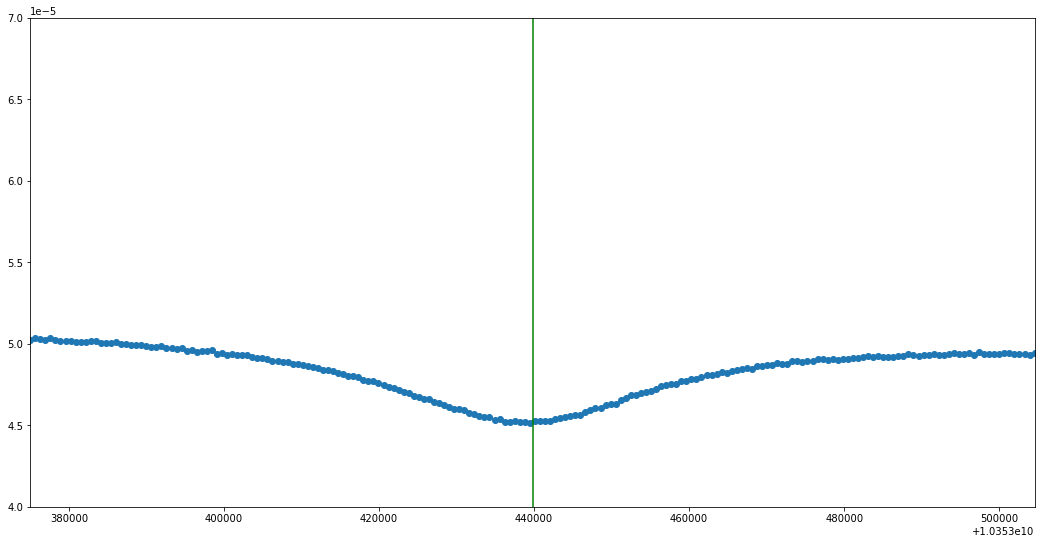

In [54]:
# Fit
def fitm(x,a,b,c,d,e,f):
    return e**2*abs(x-a+1j*b)**2/abs(x-c+1j*d)**2+f*(x-c)

center = info['cavfreq'][0]

delta = .003
scale = 1e8    # fattore di scala per lo zoom

# plot
interval = data[(data['freq']>center-65100) & (data['freq']<center+65100)] # finestra di 200 bin ognuno da 651 Hz
xfreq = interval['freq']
fmin,fmax = min(xfreq),max(xfreq)
yfft = interval['fft0']

fig,ax=plt.subplots(1,1,figsize=(18,9))
ax.plot(xfreq,yfft,'o')

ax.vlines(center,0,6,'green')
ax.set_ylim([4e-5,7e-5])
ax.set_xlim([fmin,fmax])
plt.show()

In [55]:
fmodel = Model(fitm)
ps = fmodel.make_params(a=center, b=2e4, c=center,d=2.2e4,e=1e-2,f=1e-8)
ps.add('a', value=center, min=center*0.999, max=center*1.01)
ps.add('c', value=center, min=center*0.999, max=center*1.01)

result = fmodel.fit(yfft,x=xfreq, params=ps)
#dentro il fit model dovremmo mettere anche weights e convx, ma ho capito come definirli

In [56]:
result

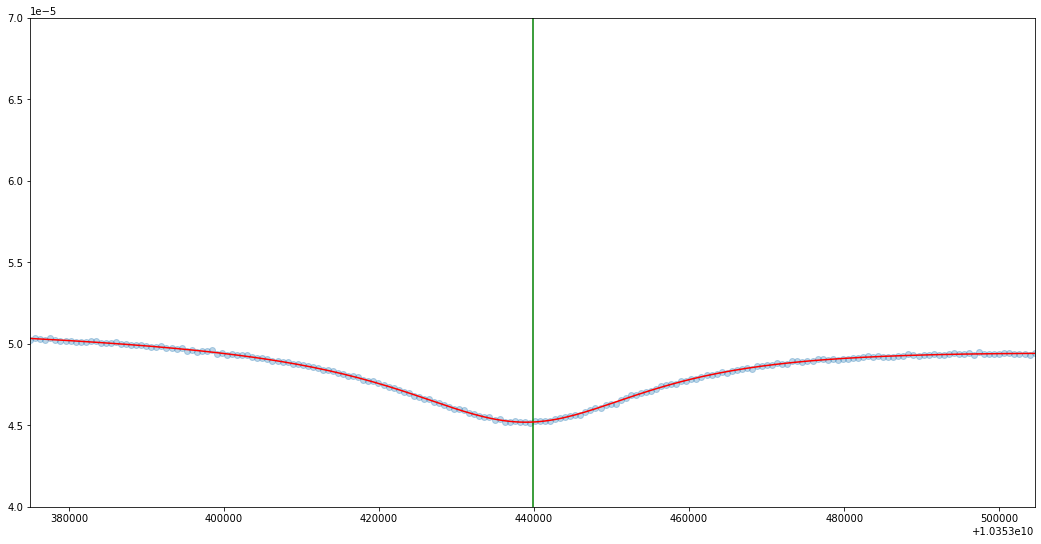

In [58]:
fig,ax=plt.subplots(1,1,figsize=(18,9))
ax.scatter(xfreq,yfft,alpha=0.3)

ax.vlines(center,0,6,'green')
ax.set_ylim([4e-5,7e-5])
ax.set_xlim([fmin,fmax])
ax.plot(xfreq,result.best_fit, label='linear model',color="red")
plt.show()